### 03-Movie-Describe.ipynb
* **Script:** 03-Movie-Describe.ipynb
* **Purpose:** Produce descriptive statistics for Oscar Bait movie analysis.
* **Input:** data/movie_data_clean.pickle
* **Output:** graphics/pct_nom_bygenre.png, graphics/pct_nom_byrun_byqtr.png, graphics/pct_nom_bycritic.png, graphics/pct_nomitated_x_budget.png

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle

from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

#### Import cleaned movie data

In [2]:
df=pd.read_pickle("data/movie_data_clean.pickle")

print "Number of Records, ", df.shape[0]

Number of Records,  6797


#### Flag Movies Nominated for one or more oscars

In [3]:
df["oscar_noms_flag"]=0
df.ix[df.oscar_noms>0, "oscar_noms_flag"]=1

pd.crosstab(df["oscar_noms"], df["oscar_noms_flag"])

oscar_noms_flag,0,1
oscar_noms,,
0,6349,0
1,0,252
2,0,62
3,0,32
4,0,22
5,0,26
6,0,19
7,0,6
8,0,12


#### Write function to produce bar chart of % Oscar nominated films by movie characteristics
* byvar = Movie characteristic
* width = bar width
* xfont = x-axis font
* yfont = y-axis font
* xlabel = x-axis label (e.g. name of by-variable)
* Returns: Bar graph by movie characteristic

In [4]:
def noms_by_variable(byvar, width, xfont, yfont, xlabel):
    xtab = pd.crosstab(df[byvar], df["oscar_noms_flag"]).apply(lambda r: (r/r.sum())*100, axis=1).sort_index(ascending=True)

    plt.bar([x for x in range(0,len(xtab.index))], xtab[1], width)
    plt.xticks([(x+(width/2)) for x in range(0,len(xtab.index))], xtab.index)
    plt.xlabel(xlabel, fontsize=yfont+4)
    plt.ylabel("Percent Nominated", fontsize=yfont+4)
    plt.title("Percent Nominated by "+xlabel, fontsize=yfont+8)
    
    plt.tick_params(axis="x",labelsize=xfont)
    plt.tick_params(axis="y",labelsize=yfont)

#### Oscar nominations by movie genre

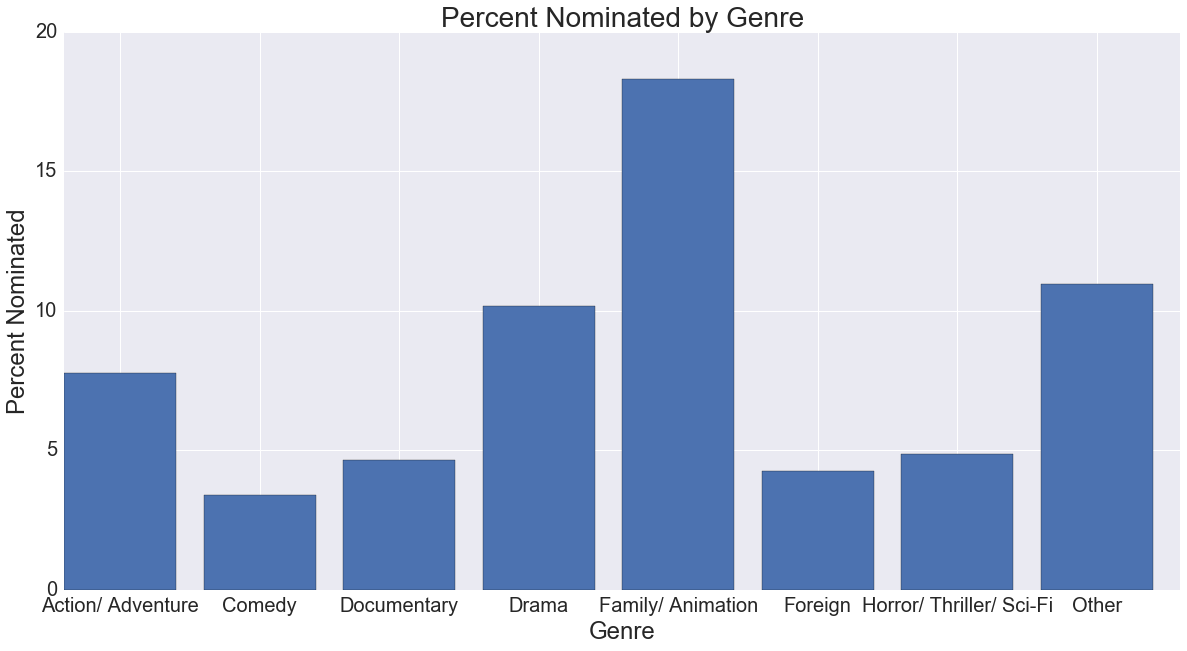

In [9]:
plt.figure(figsize=(20,10))
noms_by_variable("genre_group", 0.8, 20, 20, "Genre")
plt.savefig("graphics/pct_nom_bygenre.png")

#### Oscar Nominations by Runtime and Quarter of Release

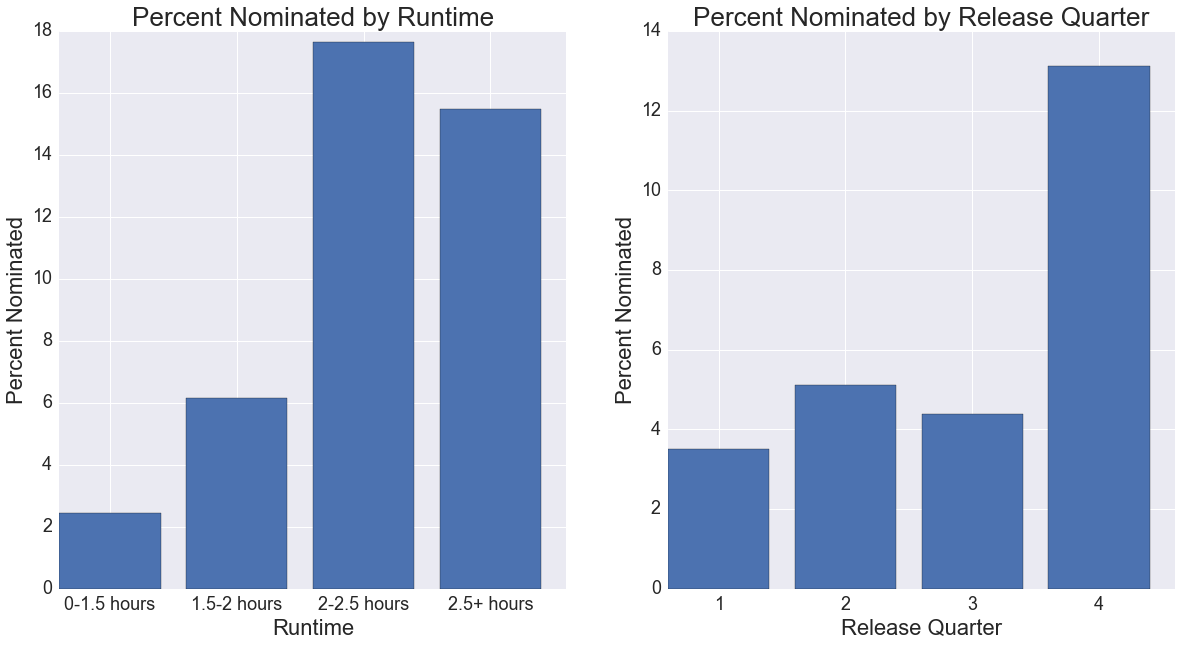

In [11]:
##Split Runtime into Categories
df["runtime_cat"]="0-1.5 hours"
df.ix[df.runtime.isnull(), "runtime_cat"]=np.nan
df.ix[df.runtime>90, "runtime_cat"]="1.5-2 hours"
df.ix[df.runtime>120, "runtime_cat"]="2-2.5 hours"
df.ix[df.runtime>150, "runtime_cat"]="2.5+ hours"

#Produce Bar Graphs
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
noms_by_variable("runtime_cat", 0.8, 18, 18, "Runtime")

plt.subplot(1,2,2)
noms_by_variable("release_qtr", 0.8, 18, 18, "Release Quarter")
plt.savefig("graphics/pct_nom_byrun_byqtr.png")

#### Oscar nominations by critical and audience reception
#### Bin ratings

In [12]:
def bin_ratings(var, catvar):
    df[catvar]="0-25%"
    df.ix[df[var]>25, catvar]="26-50%"
    df.ix[df[var]>50, catvar]="51-75%"
    df.ix[df[var]>75, catvar]="75-100%"
    df.ix[df[var].isnull(), catvar]="n/a"

bin_ratings("tomato_meter", "tomato_meter_cat")
bin_ratings("tomato_user_meter", "tomato_user_meter_cat")

#### Calculate difference between audience & critical ratings & bin

In [13]:
df["aud_critic_diff"]=df.tomato_user_meter-df.tomato_meter

df["aud_critic_diff_cat"]="-100-25%"
df.ix[df.aud_critic_diff>-25, "aud_critic_diff_cat"]="-25-0% "
df.ix[df.aud_critic_diff>0, "aud_critic_diff_cat"]="0-25%"
df.ix[df.aud_critic_diff>25, "aud_critic_diff_cat"]="25-100%"
df.ix[df.aud_critic_diff.isnull(), "aud_critic_diff_cat"]="n/a"

#### Plot Oscar nominations by reception

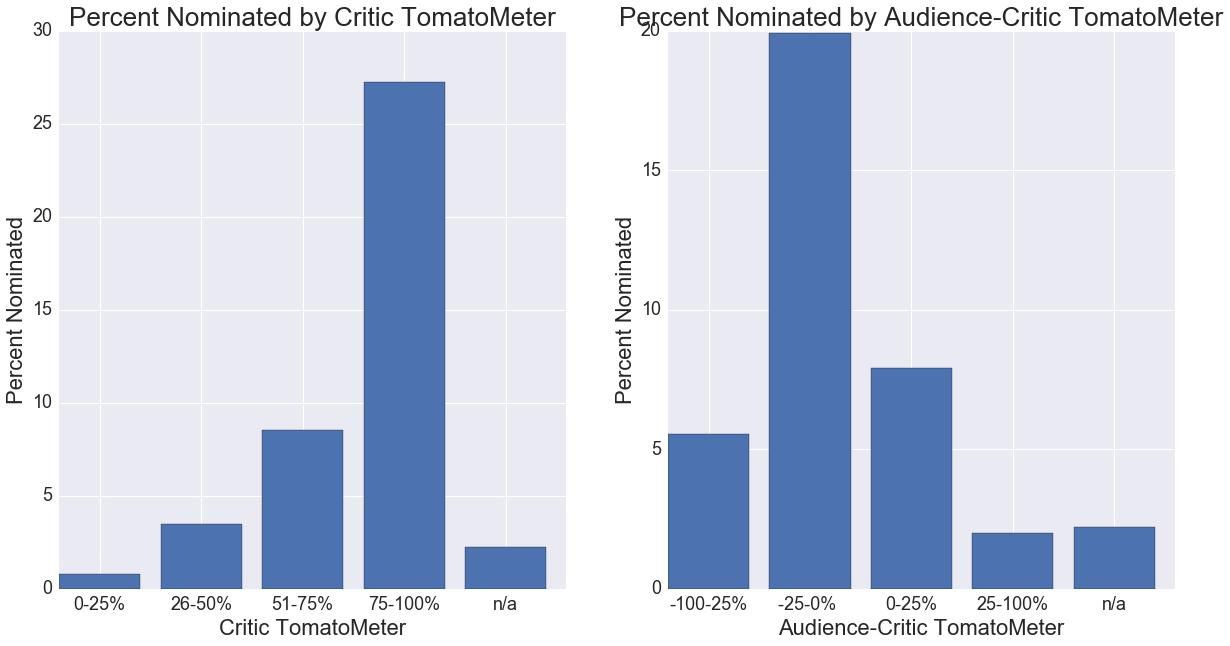

In [16]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
noms_by_variable("tomato_meter_cat", 0.8, 18, 18, "Critic TomatoMeter")

plt.subplot(1,2,2)
noms_by_variable("aud_critic_diff_cat", 0.8, 18, 18, "Audience-Critic TomatoMeter")

plt.savefig("graphics/pct_nom_bycritic.png")

#### Oscar nominators by production budget (scatter plot)

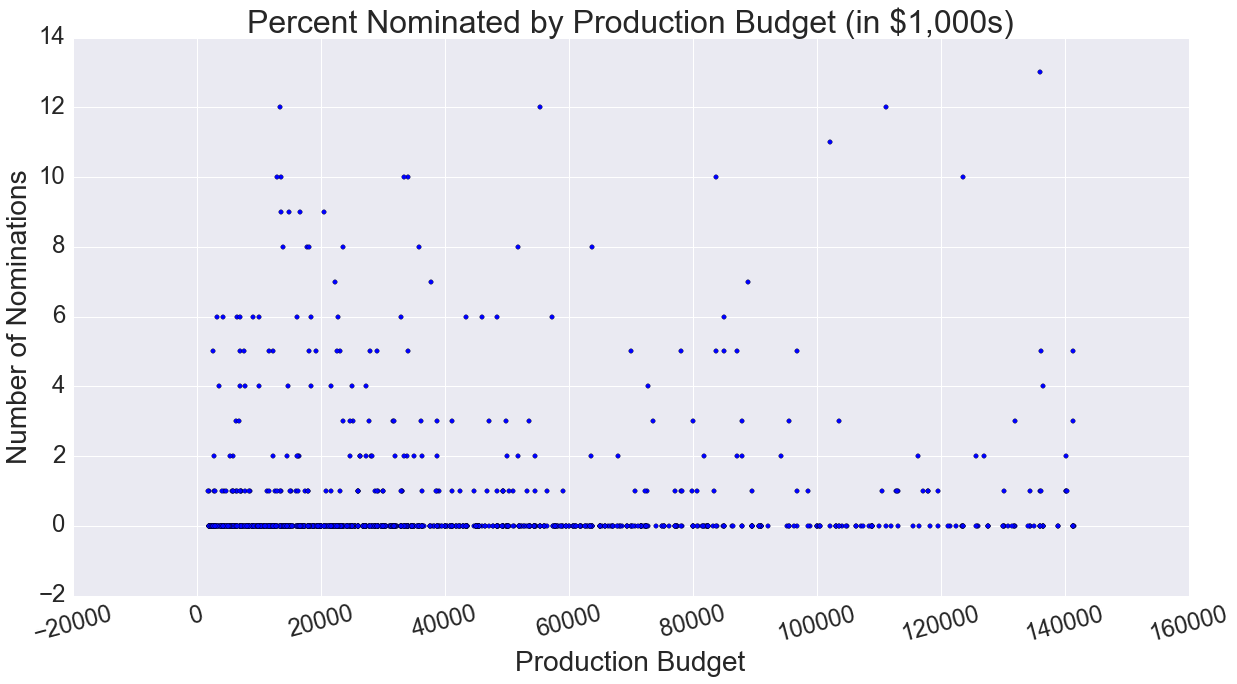

In [19]:
plt.figure(figsize=(20,10))
plt.scatter(df["budget"], df["oscar_noms"])
plt.xlabel("Production Budget", fontsize=28)
plt.ylabel("Number of Nominations", fontsize=28)
plt.tick_params(axis="x",labelsize=24)
plt.tick_params(axis="y",labelsize=24)
plt.xticks(rotation=15)
plt.title("Percent Nominated by Production Budget (in $1,000s)", fontsize=32)
plt.savefig("graphics/pct_nomitated_x_budget.png")